In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle

In [3]:
import os

In [4]:
os.getcwd()

'c:\\Users\\nandithap\\Documents'

In [5]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
Train_data=pd.read_excel("c:\\Users\\nandithap\\Downloads\\Data_Train.xlsx")
Train_data.shape
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
Test_data=pd.read_excel("C:\\Users\\nandithap\\Downloads\\Test_set.xlsx")
Test_data.shape

(2671, 10)

As we are going to apply the same preprocessing methods, we will combine both tables and later we will split them.

In [8]:
Train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [9]:
flight_df = pd.concat([Train_data, Test_data], ignore_index=True)
flight_df.head(5)
flight_df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
flight_df.shape

(13354, 11)

In [11]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
flight_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


After concatenating the training and test datasets, the Price column will contain null values for the rows that belong to the test dataset 

Exploratory Data Analysis (EDA):

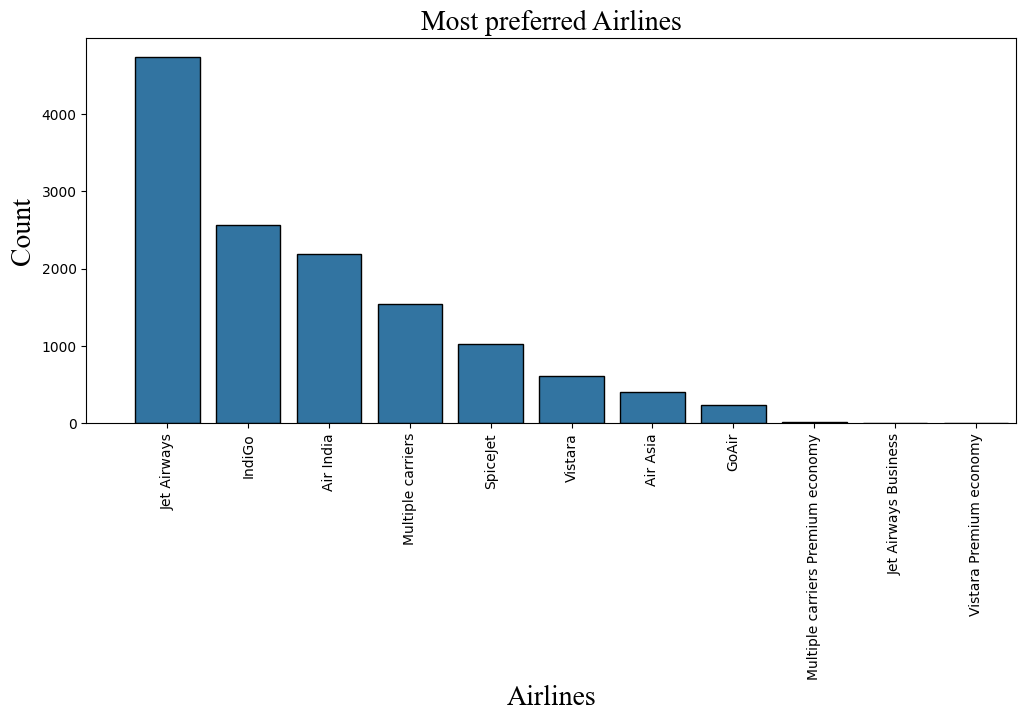

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flight_df,order = flight_df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

Observation:
-> Most preferred Airline is "Jet Airways"
-> From all the total flight tickets sold, Jet Airways has the highest share followed by Indigo.

Airlines Vs Flight ticket Price

In [14]:
airlines = flight_df.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


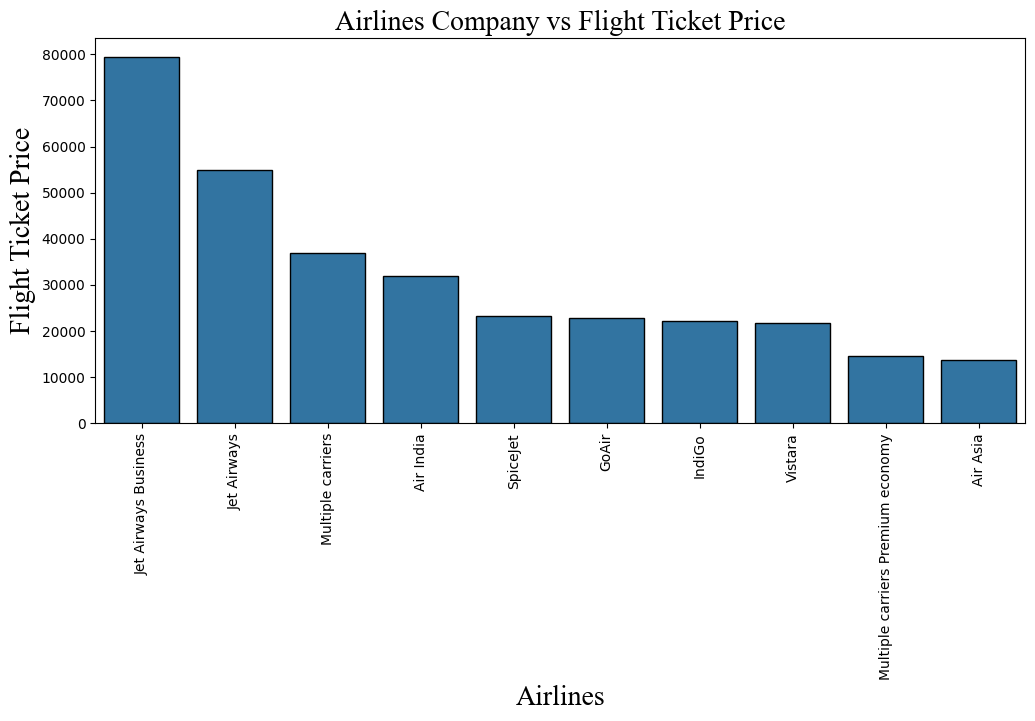

In [15]:
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

Observation:
-> "Jet Airways Business" tickets are the most expensive ones.

In [16]:
days_df = flight_df[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897.0
1,Air India,1/05/2019,7662.0
2,Jet Airways,9/06/2019,13882.0
3,IndiGo,12/05/2019,6218.0
4,IndiGo,01/03/2019,13302.0


In [17]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day in ['Saturday', 'Sunday'] else 0)
days_df.head()


,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897.0,Sunday,1
1,Air India,2019-05-01,7662.0,Wednesday,0
2,Jet Airways,2019-06-09,13882.0,Sunday,1
3,IndiGo,2019-05-12,6218.0,Sunday,1
4,IndiGo,2019-03-01,13302.0,Friday,0


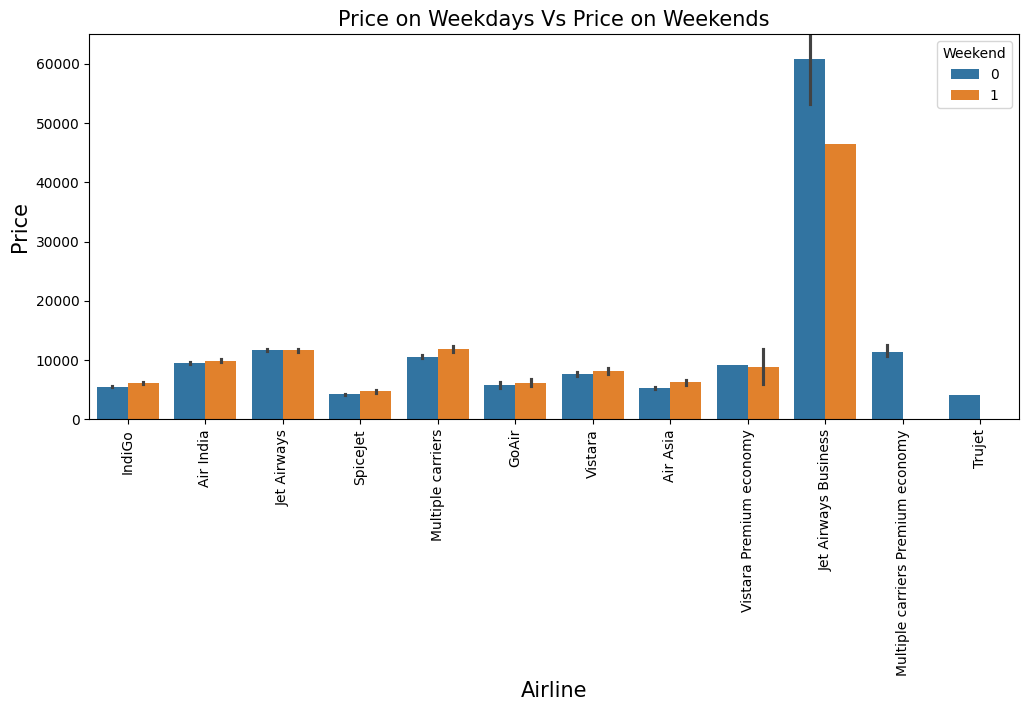

In [18]:
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

Observation:
-> The Price of tickets is slightly higher on Weekends compare to weekdays.

In [19]:
flight_df["Journey_date"]=flight_df["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_df["Journey_month"]=flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df["Journey_year"]=flight_df["Date_of_Journey"].str.split("/").str[2].astype(int)


In [20]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


Remove "Date_of_journey" and "Additional info" because they dont have any further use

In [21]:
flight_df=flight_df.drop(["Date_of_Journey"],axis=1)
flight_df=flight_df.drop(["Additional_Info"],axis=1)

In [22]:
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0,1,3,2019


As we can observe, the Journey_year is the same for all rows, so there is no need to keep it. We will remove it from the DataFrame.

In [23]:
# Get unique sources
unique_sources = flight_df['Source'].unique()

# Get unique destinations
unique_destinations = flight_df['Destination'].unique()

# Convert to lists if you need them in list format
source_list = unique_sources.tolist()
destination_list = unique_destinations.tolist()

print([source_list+destination_list])


[['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai', 'New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']]


In [24]:
flight_df=flight_df.drop(["Journey_year"],axis=1)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0,1,3


In [25]:
# Total_Stops 

flight_df["Total_Stops"]=flight_df["Total_Stops"].str.split(" ").str[0]
flight_df["Total_Stops"]=flight_df["Total_Stops"].replace("non-stop","0")
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302.0,1,3


In [26]:
# Extracting hours and min from Arrival time, Departure time 


# Arrival_Time
flight_df["Arrival_Time"]=flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df['Arrival_hour']=flight_df["Arrival_Time"].str.split(':').str[0].astype(int)
flight_df['Arrival_min']=flight_df["Arrival_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Arrival_Time"],axis=1)

# Dep_Time
flight_df['Dep_hour']=flight_df["Dep_Time"].str.split(':').str[0].astype(int)
flight_df['Dep_min']=flight_df["Dep_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Dep_Time"],axis=1)

flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,13302.0,1,3,21,35,16,50


Route column
-> The route column tells about the journey's path.
-> Route column can be removed because 'Total_Stops' field has already captured this value and both are related.

In [27]:
flight_df.drop(["Route"], axis = 1, inplace = True)

In [28]:

flight_df.head()


,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50


Duration column
-> Extract hours and min from Duration feature.
-> Convert hours to min and find total duration in minutes to make it a single column.

In [29]:
def convert_duration_to_minutes(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].split('m')[0].strip())
    return hours * 60 + minutes

# Apply the function to the Duration column
flight_df['Total_Duration_Minutes'] = flight_df['Duration'].apply(convert_duration_to_minutes)


In [30]:
flight_df = flight_df.drop(columns=['Duration'])

In [31]:
flight_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total_Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662.0,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,21,35,16,50,285


In [32]:
flight_df.isnull().sum()

Airline                      0
Source                       0
Destination                  0
Total_Stops                  1
Price                     2671
Journey_date                 0
Journey_month                0
Arrival_hour                 0
Arrival_min                  0
Dep_hour                     0
Dep_min                      0
Total_Duration_Minutes       0
dtype: int64

In [33]:
# Price column has null values. Fill it with mean value
flight_df["Price"].fillna(flight_df["Price"].mean(),inplace=True)

In [34]:
# '1' is most frequently occuring value. So fill Total_Stops column null values by '1'
flight_df["Total_Stops"]=flight_df["Total_Stops"].fillna('1')
flight_df["Total_Stops"]=flight_df["Total_Stops"].astype(int)

In [35]:
flight_df.isnull().sum()

Airline                   0
Source                    0
Destination               0
Total_Stops               0
Price                     0
Journey_date              0
Journey_month             0
Arrival_hour              0
Arrival_min               0
Dep_hour                  0
Dep_min                   0
Total_Duration_Minutes    0
dtype: int64

Using Encoding to Handle categorical data

Features with Categorical data
-> Airline
-> Source
-> Destination

In [36]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["Airline","Source","Destination"]:
    flight_df[i]=la.fit_transform(flight_df[i])
flight_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total_Duration_Minutes
0,3,0,5,0,3897.0,24,3,1,10,22,20,170
1,1,3,0,2,7662.0,1,5,13,15,5,50,445
2,4,2,1,2,13882.0,9,6,4,25,9,25,1140
3,3,3,0,1,6218.0,12,5,23,30,18,5,325
4,3,0,5,1,13302.0,1,3,21,35,16,50,285


Feature Selection
-> Finding out the best feature which will contribute and have good relation with the target variable(Price).

Let's use heat map to find correlation between features.

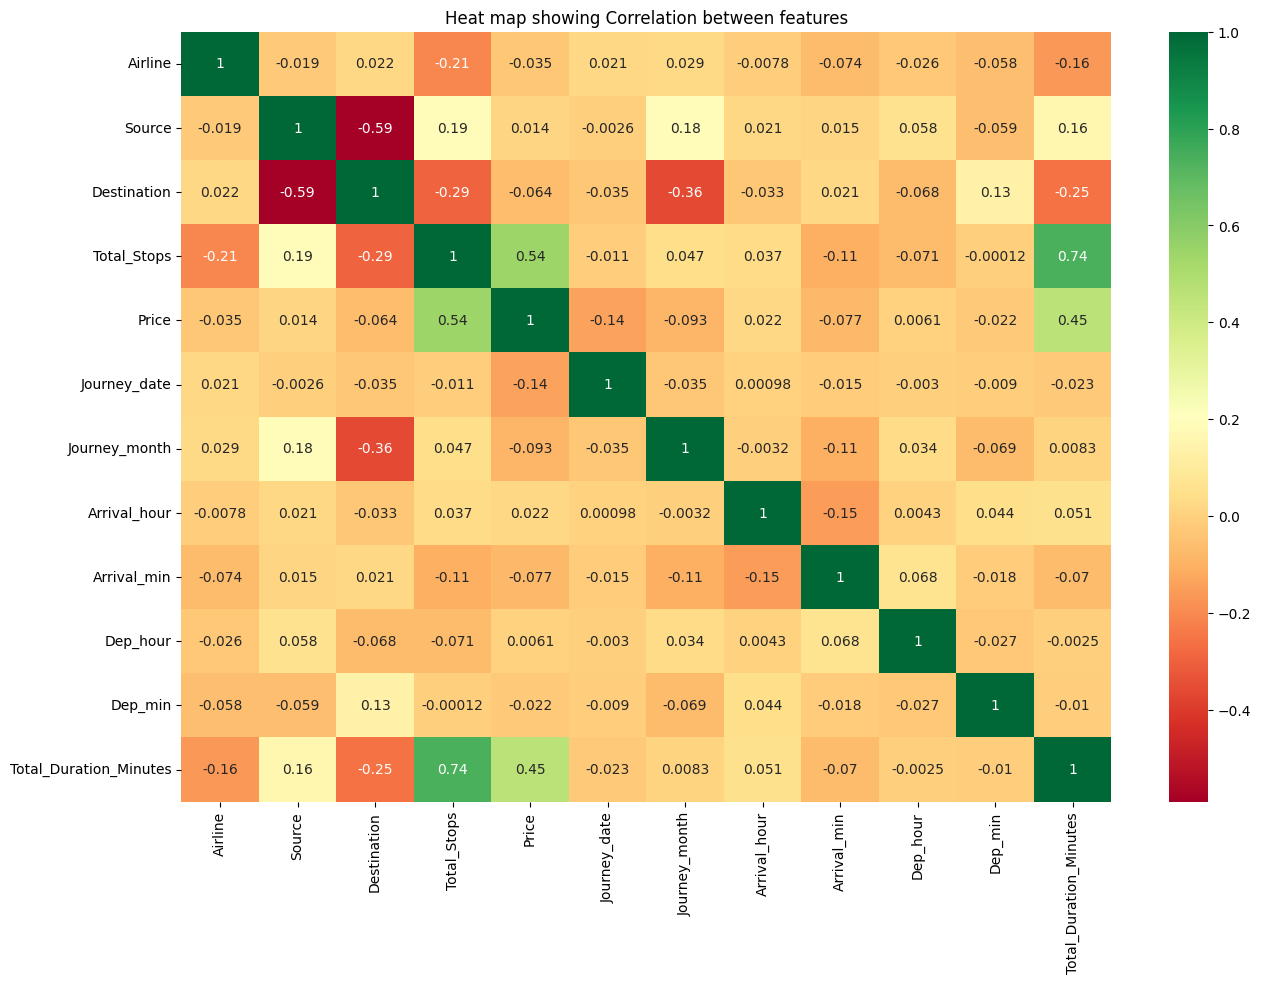

In [37]:

plt.figure(figsize=(15,10))

sns.heatmap(flight_df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

observation:
Building Machine Learning models
For predicting the Price, we build 3 models using the following algorithms:


Observation:
There is a high correlation between:
-> Price & Total Stops
-> Price & flight duration
-> Duration & Total stops

Building Machine Learning models
For predicting the Price, we build 3 models using the following algorithms:

K neighnors regressor
Decision Tree regressor
Random Forest Regressor

Compare the accuracies got from these 3 models and select the best model. Apply hyperparameter tuning to increase its efficiency.

In [38]:
#splitting data into train and test dataframe 
train_df=flight_df[0:10683]
test_df=flight_df[10683:]

In [39]:
#splitting data into x and y
x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values

In [40]:
# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
#function to train the models
def predict(algorithm):
    print("Algorithm:",algorithm)
    model=algorithm.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print("r2 score :",r2)
    #updating score in df  
    #score=score.append({'Model':algorithm,'Accuracy':r2})
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    return(r2)

In [43]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The Predicted Price values are: [[ 8399.4]
 [ 3843.4]
 [10933. ]
 ...
 [14808.8]
 [ 6443.2]
 [ 6902.4]]


r2 score : 0.5879843010673047
MAE: 1769.215050542868
MSE: 8584361.297955822


In [44]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The Predicted Price values are: [ 6314.  3857. 10991. ... 14441.  7229.  6276.]


r2 score : 0.6659093563321676
MAE: 1410.1646199925121
MSE: 6960790.083825866


In [45]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The Predicted Price values are: [ 6790.36        3850.34533333 11605.45       ... 14315.14557143
  6599.76535714  6254.59      ]


r2 score : 0.805888477952526
MAE: 1183.5110284549783
MSE: 4044320.2568935007


In [46]:
#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,58.798430
1,Decision Tree,66.590936
2,Random Forest,80.588848


The Random Forest Regressor model turned out to be the most accurate one out of the 3 models.

Hyperparameter tuning:

In [47]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [48]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [49]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.8123151619414387

In [50]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.8123151619414387
MAE: 1228.374683104181
MSE: 3910420.0743239378
RMSE: 1977.478210834177


For Random Forest Regressor,

->Before hyper tuning, R2 score = 80 %
->After hyper tuning, R2 score = 81 %
->The value of MAE drops as well, indicating that we are successful in tunning our model.

In [52]:
import pickle

# Assume rf_regressor is your trained model
pickle.dump(rf_regressor, open('flight_predict.pkl', 'wb'))


In [53]:
import pickle

# Load the model
my_model = pickle.load(open('flight_predict.pkl', 'rb'))
